Imports the necessary libraries and sets up data table

In [85]:
import pandas
import numpy
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

data = pandas.read_csv('dupremoved_trackdata.csv')
data.info()
genreMap = sorted(data["genre"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6100 non-null   object 
 1   artist            6100 non-null   object 
 2   album             6100 non-null   object 
 3   popularity        6100 non-null   int64  
 4   danceability      6100 non-null   float64
 5   energy            6100 non-null   float64
 6   key               6100 non-null   int64  
 7   loudness          6100 non-null   float64
 8   mode              6100 non-null   int64  
 9   speechiness       6100 non-null   float64
 10  acousticness      6100 non-null   float64
 11  instrumentalness  6100 non-null   float64
 12  liveness          6100 non-null   float64
 13  valence           6100 non-null   float64
 14  tempo             6100 non-null   float64
 15  id                6100 non-null   object 
 16  duration_ms       6100 non-null   int64  


Training and testing set creation 

In [101]:
X = data.drop(["name", "artist", "album", "duration_ms", "id", "genre"], axis=1)
y = preprocessing.LabelEncoder().fit_transform(data["genre"])


      popularity  danceability  energy  key  loudness  mode  speechiness  \
0             46         0.605   0.376    5   -14.978     1       0.0322   
1             30         0.266   0.516    2   -12.527     1       0.0498   
2              0         0.518   0.419    8    -8.547     1       0.0497   
3             52         0.542   0.320    8    -9.975     1       0.0387   
4             51         0.494   0.182   10   -11.116     0       0.0443   
...          ...           ...     ...  ...       ...   ...          ...   
6095          63         0.744   0.589    5    -1.218     0       0.0359   
6096          40         0.520   0.493   11   -11.360     0       0.0478   
6097          62         0.396   0.554    0    -5.048     1       0.0488   
6098          59         0.335   0.849    0    -6.927     1       0.3210   
6099           0         0.461   0.110   11   -19.901     0       0.0500   

      acousticness  instrumentalness  liveness  valence    tempo  \
0          0.25300 

Metrics using neural network

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


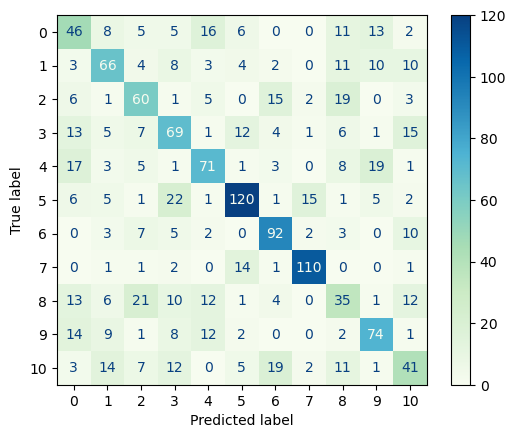

Accuracy: 0.562
Precision: 0.550
Recall: 0.553
['R&B', 'country', 'disco', 'electronic', 'folk', 'hiphop', 'jazz', 'metal', 'orchestral', 'pop', 'reggae', 'rock']


In [107]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
model = neural_network.MLPClassifier(activation= 'tanh', max_iter= 10000000).fit(X_train, y_train)  


yPredicted = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % metrics.accuracy_score(y_test, yPredicted))
print('Precision: %.3f' % metrics.precision_score(y_test, yPredicted, average="macro"))
print('Recall: %.3f' % metrics.recall_score(y_test, yPredicted, average="macro")) 
print(genreMap)

Metrics using K neighbors, k clusters found using elbow method

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


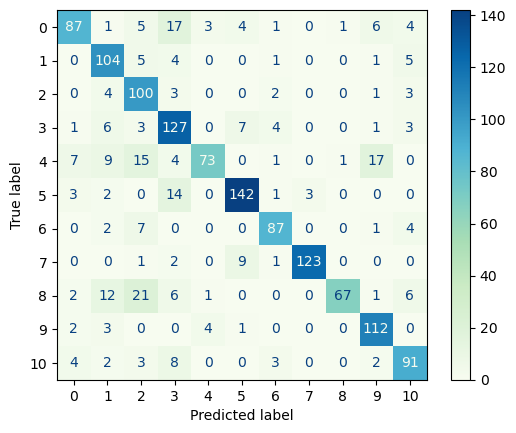

Accuracy: 0.618
Precision: 0.621
Recall: 0.611
['R&B', 'country', 'disco', 'electronic', 'folk', 'hiphop', 'jazz', 'metal', 'orchestral', 'pop', 'reggae', 'rock']


In [103]:
bestK = 0
maxAccuracy = 0
for i in range(1000) :
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    model = neighbors.KNeighborsClassifier(n_neighbors= i + 1, weights= 'distance', algorithm= 'brute')
    model.fit(X_train, y_train) 
    yPredicted = model.predict(X_test)
    if  metrics.accuracy_score(y_test, yPredicted) > maxAccuracy :
        bestX = X_test
        bestY = y_test
        bestPrediction = yPredicted
        maxAccuracy =  metrics.accuracy_score(y_test, yPredicted)
        bestK = i



metrics.plot_confusion_matrix(model, bestX, bestY, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % metrics.accuracy_score(bestY, bestPrediction))
print('Precision: %.3f' % metrics.precision_score(bestY, bestPrediction, average="macro"))
print('Recall: %.3f' % metrics.recall_score(bestY, bestPrediction, average="macro")) 
print(genreMap)
